# Energia Livre 

## Fundamentos Teóricos

<font size =4>
A espontaneidade de um processo químico pode ser avaliado pela variação na energia livre de Gibbs, $\Delta G$. Esta função de estado termodinâmica é definida como:
    
$$ G = H - TS $$

Onde:

G < 0: processo espontâneo

G > 0: processo não espontâneo

G = 0: equilíbrio

Podemos escrever a equação fundamental da energia livre da seguinte forma:

$$ dG = -SdT + Vdp $$

Sendo $ G = G(T,p) $, indicando que T e p são variáveis naturais de G, isto é, variáveis que podem ser controladas nas vizinhanças do sistema e que afetarão o valor de G. Um processo que ocorre em um sistema a T e p constante estará em equilíbrio quando a energia livre de Gibbs for um mínimo. Como consequência da equação fundamental, em um sistema com composição  constante:

$-S = \left ( \frac{\partial G}{\partial T} \right)_p $, $V = \left ( \frac{\partial G}{\partial p} \right)_T$

<font>

In [1]:
#bibliotecas necessárias para resolução de exercícios
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D

# Exemplo 1: Cálculo de G durante uma expansão

<font size ="4"> Determine $\Delta G$ para compressão de 1,00 mol de uma amostra de $O_2$ a 0ºC, de 1,00 bar até o 10,0 bar a partir dos seguintes dados de p-V:
    
|   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|
p(bar)|1,000|1,500|2,000|3,000|4,000|6,000|8,000|10,00
$V_m$(L/mol)|27,711|15,133|11,344|7,555|5,661|3,767|2,820|2,251

    
## Solução

A dependência de G com a pressão é dado pela seguinte relação: $ \left ( \frac{\partial G_m}{\partial p} \right )_T = V_m $
    
A resolução desta equação diferencial por separação de variáveis leva a integral:
    
$$ \Delta G_m = \int_{p_1} ^{p_2} V_m dp $$

Logo, o valor de $ \Delta G_m $ é a área abaixo da curva p-V, que pode ser calculado por algum método de integração numérica.
<font>

In [2]:
p = np.array([1.000,1.500,2.000,3.000,4.000,6.000,8.000,10.00])*1e5 #Pa
V = np.array([27.711,15.133,11.344,7.555,5.661,3.767,2.820,2.251])*1e-3 #m³/mol

G = simps(p, V)  # integração usando a regra de Simpson

print('\u0394G (J/mol) = ' + format(G, '6.3e'))

ΔG (J/mol) = -5.785e+03


## Exemplo 2

<font size = 4> 
Foram obtidas as seguntes equações para $G_m, S_m ~e~ V_m $:
    
$$ G_m = -T \ln(T^{5/2}/p) $$

$$ S_m = \ln(T^{5/2}/p) $$

$$ V_m = T/p $$

**a)** Contrua gráficos para $G_m, S_m ~e~ V_m $ no intervalo de 100 a 500 K e 0,1 a 20 bar. Discuta a inclinação dos gráficos em termos de T e p.





<font>

## Solução

<font size = 4>
A construção dos gráficos seguirá os seguintes passos:

* Definição do intervalo de T e p na forma de vetor;
* Definição das funções que descrevem as propriedades termodinâmicas;
* Construção da superfície usando plt.axes(projection='3d') e ax.plot_surface(...)
    
<font>

In [3]:
#Definição do intervalo de valores de T e p
T = np.linspace(100,500,100)
p = np.linspace(0.1,20,100)

#definição das funções termodinâmicas
def G(T,p):
    
    return  -T * np.log(T**2.5/p)

def S(T,p):
    return  np.log(T**2.5/p)

def V(T,p):
    return  T/p

# transforma os vetores em uma matriz
X, Y = np.meshgrid(T, p)

#calcula o valor das propriedades termodinâmicas de acordo com o grid gerado
Z1 = G(X,Y)
Z2 = S(X,Y)
Z3 = V(X,Y)


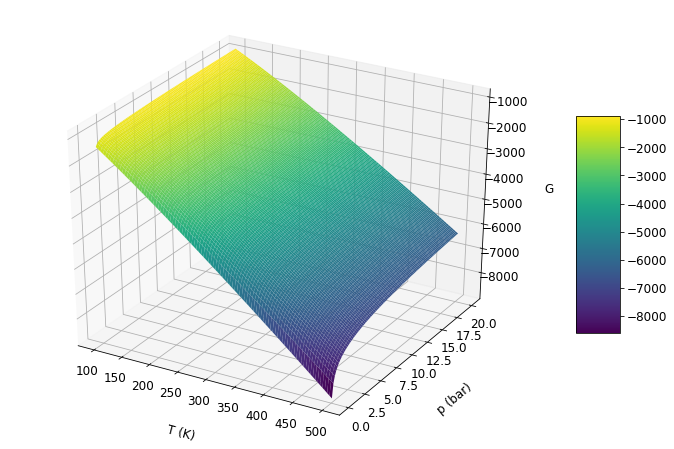

In [4]:
plt.rcParams.update({'font.size': 12}) # estes dois parâmetros precisam aparecer antes da definição do plot
fig = plt.figure(figsize=(12,8)) # as 2 linhas controlam o tamanho do gráfico


#cria a superfície desejada
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z1, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

#ax.set_title('surface');

ax.set_xlabel('T (K)', labelpad=20)
ax.set_ylabel('p (bar)', labelpad=20)
ax.set_zlabel('G', labelpad=20)

#adiciona uma escala de cores
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<font size = 4> De acordo com o gráfico, o aumnto da temperatura e diminui a energia de Gibbs, enquanto que o aumento da pressão leva ao aumento de G. Logo, G é diretamente proporcional e pressão e inversamente proporcional a temperatura. <font>

<font size = 4> Agora é só repetir a construção do gráfico apra as outras propriedades termodinâmicas. <font>

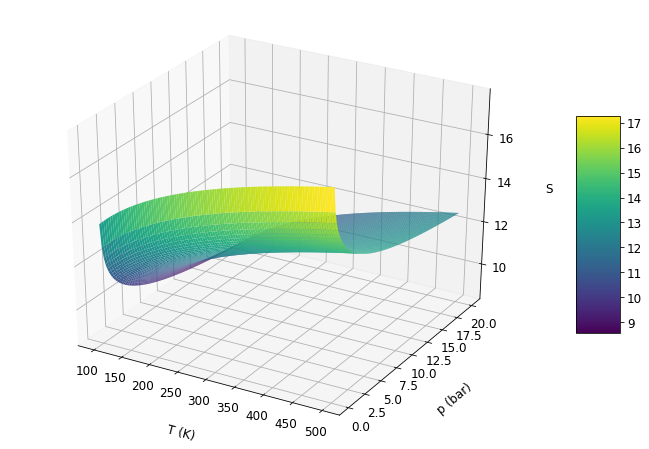

In [5]:
plt.rcParams.update({'font.size': 12}) # estes dois parâmetros precisam aparecer antes da definição do plot
fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z2, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.set_title('surface');

ax.set_xlabel('T (K)', labelpad=20)
ax.set_ylabel('p (bar)', labelpad=20)
ax.set_zlabel('S', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<font size = 4> A entropia apresenta um mínimo quando T e p variam simultaneamente. O abaixamento da pressão e aumento da temperatura levam ao aumento da entropia. Logo, a entropia é diretamente proporcional a T e inversamente proporcional p. <font>

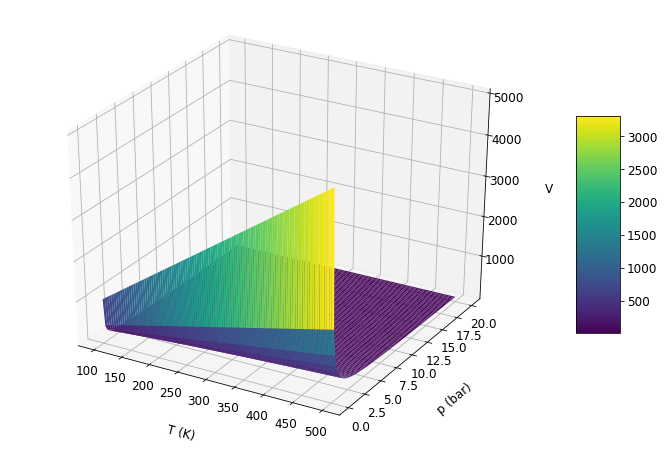

In [6]:
plt.rcParams.update({'font.size': 12}) # estes dois parâmetros precisam aparecer antes da definição do plot
fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z3, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#ax.set_title('surface');

ax.set_xlabel('T (K)', labelpad=20)
ax.set_ylabel('p (bar)', labelpad=20)
ax.set_zlabel('V', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<font size = 4> Este gráfico confirma as leis empríricas dos gases: V é inversamente proporcional a p e diretamente proporcional a temperatura. <font>

## Exemplo 3: Calculando entropia

<font size =4>
Use os dados da tabela para calcular $ \frac{G^0 _T - H^0 _{298K}}{T}$ para o $CCl_4$ a 1425 K.
    
|   |   |   |   |   |   |   | 
|---|---|---|---|---|---|---|
T(K)|1000|1200|1400|1600|1800|2000
$ \frac{G^0 _T - H^0 _{298K}}{T}$(J/K mol)|-357,595|-370,798|-382,757|-393,632|-403,577|-412,725
    
<font>

## Solução

<font size =4>
Pela definição de G, pode-se observar que a grandeza que está sendo calculada é a entropia a 1425 K. O cálculo é feito assumindo que a entalpia é constante em todo o intervalo de temperaturas. O problema pode ser resolvido de duas formas:
    
1. Verificando que  $ \frac{G^0 _T - H^0 _{298K}}{T} $ tem uma dependência quase linear com T, e depois fazer uma interpolação linear para obter o valor desejado;
2. Ajustar um polinômio aos dados do problema e, de posse da equação, calcular o valor da entropia na temperatura desejada.
    
<font>

## Solução 1:

<font size = 4>Será usada a biblioteca numpy.interp((x, xp, fp) para fazer a interpolação linear. Os argumentos da função são:
* x: A temperatura em que se deseja fazer o cáclulo
* xp: A variável independente, neste caso, T
* fp: A variável dependente

Inicialmente o gráfico será cosntruído para verificar a dependência linear dos pontos com a temperatura.
    <font>
    
    

<function matplotlib.pyplot.show(*args, **kw)>

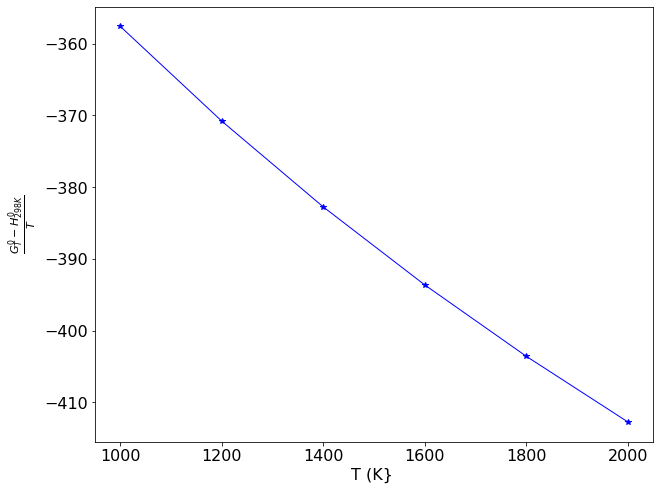

In [7]:
T = np.array([1000,1200,1400,1600,1800,2000])
S = np.array([-357.595,-370.798,-382.757,-393.632,-403.577,-412.725])

# Criando os gráficos
# estes dois parâmetros precisam aparecer antes da definição do plot
plt.rcParams.update({'font.size': 16}) #define o tamanho da fonte
plt.figure(figsize=(10,8)) #define as dimensões do gráfico

plt.plot(T,S, '-*', color='blue', linewidth=1)
plt.xlabel('T (K} ')
plt.ylabel(r'$ \frac{G^0 _T - H^0 _{298K}}{T}$')
plt.show

<font size = 4> De acordo com o gráfico, a função $ \frac{G^0 _T - H^0 _{298K}}{T}$  é inversamente proporcional a T, e decresce quase que linearmente a medida que T aumenta. Logo, a interpolação linear entre 2 pontos é suficiente para obter o valor desejado.<font>

In [10]:
# Interpolação

s = np.interp(1425, T, S)

print('Entropia a 1425K (J/K mol)= ', s)

Entropia a 1425K (J/K mol)=  -384.116375


## Solução 2:

<font size = 4>Fazer a regressão e substituir o valor da temperatura na equação obtida. O gráfico apresenta uma leve curvatura a medida que T aumenta, logo, uma função de segundo grau deve se ajustar de forma adequada ao pontos do problema.<font>

In [11]:
#ajuste do polinômio
deg = 2
z = np.polyfit(T, S, deg)
y = np.poly1d(z)

print('Entropia a 1425K (J/K mol)= ', y(1425))

Entropia a 1425K (J/K mol)=  -384.12824112723223


<font size = 4> Como esperado os resultados são similares mas diferentes. Isso é esperado porque os procedimentos adotados para o cálculo são diferentes. O leitor é encorajado a verificar o resultado usando uma função de primeiro grau. Neste caso a diferença entre os dois resultados será maior, pois a função de primeiro grau não se ajusta tão bem aos dados fornecidos no problema. Isso mostra a importância de de uma verificação prévia dos dados antes de qualquer cálculo. <font>